### Análise de Dados com Pandas
* Projeto Final - Trilha DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY) - Turma 890
* Grupo 3

Integrantes: 
- Carlos Henrique
- Daniel Arnóbio
- Laila Souza
- Taiara Sampaio
- Victor Hugo



#### Dataset: Home Credit Default Risk (Kaggle)
*Dados estáticos das requisições de financiamento. Cada linha representa um empréstimo no dataset.*


Disponível para download em: [https://www.kaggle.com/competitions/home-credit-default-risk/data?select=application_train.csv](https://www.kaggle.com/competitions/home-credit-default-risk/data?select=application_train.csv)


------
Considerando os temas estudados neste módulo e o dataset **home_credit_default_risk_application_100000** (*que é um recorte das 100.000 primeiras linhas do dataset supracitado*), responda apenas 12 das perguntas a seguir.

Observações e/ou recomendações de tratamento:
- Necessário fatiar de acordo com as colunas listadas na lista **selected_columns** informada abaixo
- Juntar/Tratar os vários tipos de Industry no campo ORGANIZATION_TYPE;
- Juntar/Tratar os vários tipos de Trade no campo ORGANIZATION_TYPE;
- Juntar/Tratar os vários tipos de Transport no campo ORGANIZATION_TYPE;
- Juntar/Tratar os vários tipos de Business Entity no campo ORGANIZATION_TYPE;
- Algumas colunas apresentam outliers que PRECISAM ser desconsiderados ou zerados, como o valor 365243 em DAYS_EMPLOYED.
- As colunas que contam dias levam em consideração DATADACOLUNA - HOJE, gerando, muitas vezes, números negativos que não devem prejudicar a análise.
- Preferencialmente, sempre ordene os resultados de forma ascendente ou descendente.

Glossário de apoio:
- block of flats = apartamentos
- AMT = amount / valor
- QRT = Quarter / Trimestre
-  CNT = count / qty / quantidade
- 0 = Não / False / No
- 1 = Sim / True / Yes






---
##### Perguntas - **Escolham 12 dentre todas abaixo**:

- 01) Qual é a idade, em anos, do titular mais jovem?
- 02) Qual a média do valor de anuidade dos residentes em apartamentos maiores de 50 anos?
- 03) Existe uma correlação forte entre ter imóvel próprio e ter carro próprio? Por que?
- 04) Quais os 3 principais tipos de ocupação de quem mora com parentes?
- 05) Qual é a diferença entre a média de valor de crédito e a média de valor de anuidade quando filtramos pelos trabalhadores do tipo de organização Military?
- 06) Considerando os tipos de ocupação, podemos dizer que os "Managers" possuem um valor de anuidade mais alto? Se não, qual é? 
- 07) Qual é o horário e dia da semana que mais trabalhadores dos tipos de organização Bank & Government optam por requisitar o financiamento?
- 08) Qual a média de requisições de empréstimo entre trabalhadores com tipo de ocupação "Sales staff", que não moram com parentes, declararam não estarem em situação de emergência e possuem telefone de trabalho?
- 09) Como você explica a correlação entre o número de filhos e idade (em anos)?
- 10) Podemos concluir que, quanto mais tempo empregado, maior o crédito? Por que?
- 11) Qual o desvio padrão da quantidade de filhos de quem tem 8 familiares?
- 12) Quantos registros existem em que o número de filhos é maior que o número de familiares?
- 13) Qual a média de dias por estado civil em que o telefone foi alterado de quem tem até 3 filhos, até 40 anos de idade e tem seu próprio imóvel?
- 14) Qual a quantidade de requisições por escolaridade x possuir o seu próprio carro x possuir sua própria casa?
- 15) Quais os 3 tipos de organização em que seus empregados mais requisitaram análise de crédito pelo Bureau no último trimestre (com exceção do tipo Other)?
- 16) Qual gênero requisitou mais análise de crédito na última semana?
- 17) Existe alguma inconsistência no campo que indica o tempo de posse do carro? Ou seja, existem registros em que o requisitante informou não ter carro e informou o tempo ou vice-versa?
- 18) Qual a média de idade (em anos) por tipo de ocupação e escolaridade?
- 19) Qual a média de valor de anuidade contratada considerando o número de filhos e escolaridade dos requisitantes que solicitaram financiamento em dia útil dentro do horário comercial padrão (8h às 18h)?
- 20) Quais a média de crédito, média de filhos e média de idade (em anos) de quem declarou estado de emergência?
- 21) Quais os tipos de ocupação e tipo de organização dos requisitantes com idade maior que 60 anos?
- 22) Ao analisar correlações, quantidades e agrupamentos entre colunas de marcadores como possuir carro, possuir casa, tipo de moradia, estado civil, escolaridade ou afins, o que chama sua atenção?
- 23) Quais as 10 colunas que você julga serem mais importantes ao avaliar o risco de inadimplência? Por que?
- 24) Considerando a quantidade de campos nulos, quais colunas podem ter seu valor substituído por 0 ou N (Não, No, False) sem prejuízo para a análise feita aqui?

___
___
___

In [50]:
#listando as colunas que serão utilizadas para correlação

selected_columns = ['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 #'NAME_TYPE_SUITE',
 #'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 #'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 #'DAYS_REGISTRATION',
 #'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 #'FLAG_MOBIL',
 #'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 #'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 #'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 #'REG_REGION_NOT_LIVE_REGION',
 #'REG_REGION_NOT_WORK_REGION',
 #'LIVE_REGION_NOT_WORK_REGION',
 #'REG_CITY_NOT_LIVE_CITY',
 #'REG_CITY_NOT_WORK_CITY',
 #'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
#  'EXT_SOURCE_1',
#  'EXT_SOURCE_2',
#  'EXT_SOURCE_3',
#  'APARTMENTS_AVG',
#  'BASEMENTAREA_AVG',
#  'YEARS_BEGINEXPLUATATION_AVG',
#  'YEARS_BUILD_AVG',
#  'COMMONAREA_AVG',
#  'ELEVATORS_AVG',
#  'ENTRANCES_AVG',
#  'FLOORSMAX_AVG',
#  'FLOORSMIN_AVG',
#  'LANDAREA_AVG',
#  'LIVINGAPARTMENTS_AVG',
#  'LIVINGAREA_AVG',
#  'NONLIVINGAPARTMENTS_AVG',
#  'NONLIVINGAREA_AVG',
#  'APARTMENTS_MODE',
#  'BASEMENTAREA_MODE',
#  'YEARS_BEGINEXPLUATATION_MODE',
#  'YEARS_BUILD_MODE',
#  'COMMONAREA_MODE',
#  'ELEVATORS_MODE',
#  'ENTRANCES_MODE',
#  'FLOORSMAX_MODE',
#  'FLOORSMIN_MODE',
#  'LANDAREA_MODE',
#  'LIVINGAPARTMENTS_MODE',
#  'LIVINGAREA_MODE',
#  'NONLIVINGAPARTMENTS_MODE',
#  'NONLIVINGAREA_MODE',
#  'APARTMENTS_MEDI',
#  'BASEMENTAREA_MEDI',
#  'YEARS_BEGINEXPLUATATION_MEDI',
#  'YEARS_BUILD_MEDI',
#  'COMMONAREA_MEDI',
#  'ELEVATORS_MEDI',
#  'ENTRANCES_MEDI',
#  'FLOORSMAX_MEDI',
#  'FLOORSMIN_MEDI',
#  'LANDAREA_MEDI',
#  'LIVINGAPARTMENTS_MEDI',
#  'LIVINGAREA_MEDI',
#  'NONLIVINGAPARTMENTS_MEDI',
#  'NONLIVINGAREA_MEDI',
#  'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 #'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
#  'OBS_30_CNT_SOCIAL_CIRCLE',
#  'DEF_30_CNT_SOCIAL_CIRCLE',
#  'OBS_60_CNT_SOCIAL_CIRCLE',
#  'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
#  'FLAG_DOCUMENT_2',
#  'FLAG_DOCUMENT_3',
#  'FLAG_DOCUMENT_4',
#  'FLAG_DOCUMENT_5',
#  'FLAG_DOCUMENT_6',
#  'FLAG_DOCUMENT_7',
#  'FLAG_DOCUMENT_8',
#  'FLAG_DOCUMENT_9',
#  'FLAG_DOCUMENT_10',
#  'FLAG_DOCUMENT_11',
#  'FLAG_DOCUMENT_12',
#  'FLAG_DOCUMENT_13',
#  'FLAG_DOCUMENT_14',
#  'FLAG_DOCUMENT_15',
#  'FLAG_DOCUMENT_16',
#  'FLAG_DOCUMENT_17',
#  'FLAG_DOCUMENT_18',
#  'FLAG_DOCUMENT_19',
#  'FLAG_DOCUMENT_20',
#  'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [51]:
#Importando as bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')

In [52]:
#Importando os dados e filtrando as colunas
df = pd.read_csv("C:\home_credit_default_risk_application_100000.csv")
df = df[selected_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  100000 non-null  int64  
 1   TARGET                      100000 non-null  int64  
 2   NAME_CONTRACT_TYPE          100000 non-null  object 
 3   CODE_GENDER                 100000 non-null  object 
 4   FLAG_OWN_CAR                100000 non-null  object 
 5   FLAG_OWN_REALTY             100000 non-null  object 
 6   CNT_CHILDREN                100000 non-null  int64  
 7   AMT_INCOME_TOTAL            100000 non-null  float64
 8   AMT_CREDIT                  100000 non-null  float64
 9   AMT_ANNUITY                 99993 non-null   float64
 10  AMT_GOODS_PRICE             99919 non-null   float64
 11  NAME_EDUCATION_TYPE         100000 non-null  object 
 12  NAME_FAMILY_STATUS          100000 non-null  object 
 13  NAME_HOUSING_TY

In [53]:
#Colunas com valores nulos
colunas_nulos = df.isnull().sum().sort_values(ascending=False)
colunas_nulos = colunas_nulos[colunas_nulos>0]
colunas_nulos = pd.DataFrame(colunas_nulos)
colunas_nulos['proporçao %'] = (colunas_nulos/len(df))*100
colunas_nulos

,0,proporçao %
OWN_CAR_AGE,66019,66.019
WALLSMATERIAL_MODE,50765,50.765
HOUSETYPE_MODE,50105,50.105
EMERGENCYSTATE_MODE,47333,47.333
OCCUPATION_TYPE,31224,31.224
AMT_REQ_CREDIT_BUREAU_YEAR,13437,13.437
AMT_REQ_CREDIT_BUREAU_QRT,13437,13.437
AMT_REQ_CREDIT_BUREAU_MON,13437,13.437
AMT_REQ_CREDIT_BUREAU_WEEK,13437,13.437
AMT_REQ_CREDIT_BUREAU_DAY,13437,13.437


In [54]:
# Fazendo o tratamento dos types
def tratar_ORGANIZATION_TYPE(x):
    for i in range(14):
        x = str(x).replace(' Type '+str(i),'').replace(': type '+(str(i)) if (i < 10) else str(i-10),'')
    return x

df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: tratar_ORGANIZATION_TYPE(x))

01) Qual é a idade, em anos, do titular mais jovem?


<AxesSubplot:>

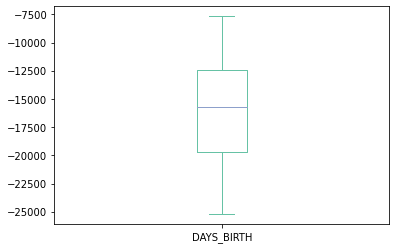

In [55]:
#Aparentemente todos os valores estão negativos e em dias
df.DAYS_BIRTH.plot(kind='box')

In [56]:
#Tratando a coluna DAYS_BIRTH
df.rename(columns = {'DAYS_BIRTH':'YEARS_BIRTH'}, inplace=True)
df['YEARS_BIRTH']= df.YEARS_BIRTH.apply(lambda x: round((x/365)*(-1), 0))

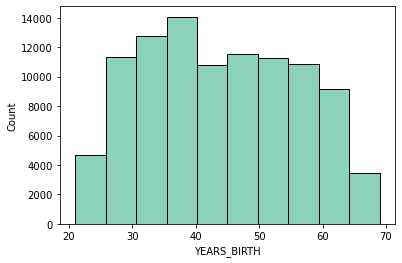

In [57]:
sns.histplot(data = df.YEARS_BIRTH, bins=10);

In [58]:
print(f'A idade, em anos, do titular mais novo é {df.YEARS_BIRTH.min()} anos')

A idade, em anos, do titular mais novo é 21.0 anos


02) Qual a média do valor de anuidade dos residentes em apartamentos maiores de 50 anos?

In [59]:
filtro = (df.YEARS_BIRTH>50) & (df.HOUSETYPE_MODE=='block of flats') 

media = df[filtro]['AMT_ANNUITY'].mean()

print(f'A média do valor da anuidade dos residentes em apartamentos maiores de 50 anos é ${media:.2f}')

A média do valor da anuidade dos residentes em apartamentos maiores de 50 anos é $27198.43


03) Existe uma correlação forte entre ter imóvel próprio e ter carro próprio? Por que?


In [60]:
#Antes de tudo, precisamos deixar as colunas com valores numéricos para calcular a correlação entre elas
df['FLAG_OWN_CAR']= df['FLAG_OWN_CAR'].apply(lambda x: 1 if (x=='Y') else 0)  
df['FLAG_OWN_REALTY']= df['FLAG_OWN_REALTY'].apply(lambda x: 1 if (x=='Y') else 0) 

In [61]:
colunas = ['FLAG_OWN_REALTY', 'FLAG_OWN_CAR']
df[colunas].corr()

,FLAG_OWN_REALTY,FLAG_OWN_CAR
FLAG_OWN_REALTY,1.00000,0.00247
FLAG_OWN_CAR,0.00247,1.00000


04) Quais os 3 principais tipos de ocupação de quem mora com parentes?


In [62]:
colunas = ['OCCUPATION_TYPE']
filtros = (df['NAME_HOUSING_TYPE'] == 'With parents')
df[filtros].groupby(colunas)['OCCUPATION_TYPE'].count().sort_values(ascending= False)[0:3]

OCCUPATION_TYPE
Laborers       1100
Sales staff     715
Core staff      576
Name: OCCUPATION_TYPE, dtype: int64

05) Qual é a diferença entre a média de valor de crédito e a média de valor de anuidade quando filtramos pelos trabalhadores do tipo de organização Military?

In [63]:
filtros = (df.OCCUPATION_TYPE == 'Military')

diferenca_medias = df[['AMT_CREDIT', 'AMT_ANNUITY']].mean()[0] - df[['AMT_CREDIT', 'AMT_ANNUITY']].mean()[1]

print(f'A diferença entre as médias é ${diferenca_medias:.2f}')

A diferença entre as médias é $571918.12


In [64]:
df[filtros][['AMT_CREDIT', 'AMT_ANNUITY']].mean()

AMT_CREDIT    NaN
AMT_ANNUITY   NaN
dtype: float64

06) Considerando os tipos de ocupação, podemos dizer que os "Managers" possuem um valor de anuidade mais alto? Se não, qual é? 

In [65]:
colunas = ['OCCUPATION_TYPE']
serie = df.groupby(colunas)['AMT_ANNUITY'].max().sort_values(ascending= False)[0:3]
serie = pd.DataFrame(serie).reset_index()

In [66]:
serie.columns

Index(['OCCUPATION_TYPE', 'AMT_ANNUITY'], dtype='object')

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='AMT_ANNUITY'>

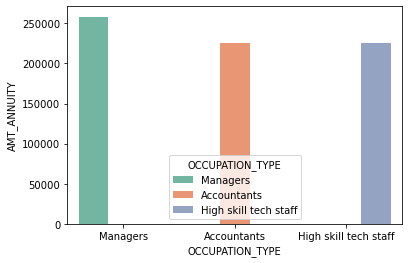

In [67]:
sns.barplot(data = serie, x= 'OCCUPATION_TYPE', y = 'AMT_ANNUITY', hue ='OCCUPATION_TYPE')

07) Qual é o horário e dia da semana que mais trabalhadores dos tipos de organização Bank & Government optam por requisitar o financiamento?

In [68]:
filtros =  (df['ORGANIZATION_TYPE']=='Bank') | (df['ORGANIZATION_TYPE']=='Government')
df[filtros][['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']].value_counts().head(1)

WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START
TUESDAY                     11                         98
dtype: int64

08) Qual a média de requisições de empréstimo entre trabalhadores com tipo de ocupação "Sales staff", que não moram com parentes, declararam não estarem em situação de emergência e possuem telefone de trabalho?

In [69]:
colunas = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'EMERGENCYSTATE_MODE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'OCCUPATION_TYPE']
 
filtros = (df.OCCUPATION_TYPE == 'Sales staff') & (df.NAME_HOUSING_TYPE != 'With parents') & (df.EMERGENCYSTATE_MODE == 'No') &  (df.FLAG_WORK_PHONE == 1)
media = df[filtros]['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()
print(f'Média: {media:.2f}')

Média: 1.70


<AxesSubplot:ylabel='Frequency'>

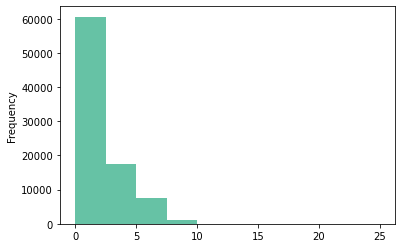

In [70]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.plot(kind='hist')

09) Como você explica a correlação entre o número de filhos e idade (em anos)?

In [71]:
df[['CNT_CHILDREN','YEARS_BIRTH']].corr()

,CNT_CHILDREN,YEARS_BIRTH
CNT_CHILDREN,1.00000,-0.32974
YEARS_BIRTH,-0.32974,1.00000


 10) Podemos concluir que, quanto mais tempo empregado, maior o crédito? Por que?

In [72]:
# Tratando os valores da coluna para deixar em anos e positivo
df.rename(columns = {'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)
df['YEARS_EMPLOYED']= df.YEARS_EMPLOYED.apply(lambda x: round((x/365)*(-1), 0))
df['YEARS_EMPLOYED'].head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: YEARS_EMPLOYED, dtype: float64

<AxesSubplot:>

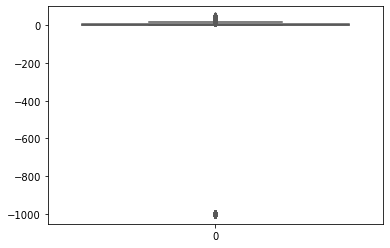

In [73]:
sns.boxplot(data = df['YEARS_EMPLOYED'])

<AxesSubplot:>

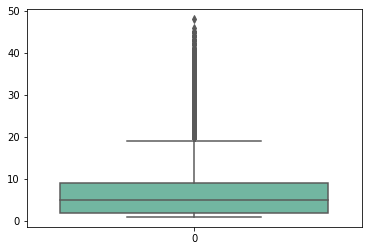

In [74]:
#Tratando o outlier da coluna YEARS_EMPLOYED
filtro = (df['YEARS_EMPLOYED'] >0)
df= df[filtro]
sns.boxplot(data = df['YEARS_EMPLOYED'])

In [75]:
# Calculando a correlação

df[['AMT_CREDIT', 'YEARS_EMPLOYED']].corr()

,AMT_CREDIT,YEARS_EMPLOYED
AMT_CREDIT,1.000000,0.089466
YEARS_EMPLOYED,0.089466,1.000000


<AxesSubplot:xlabel='YEARS_EMPLOYED', ylabel='AMT_CREDIT'>

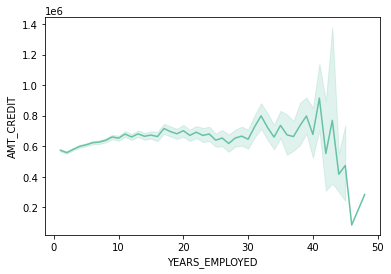

In [76]:
sns.lineplot(data = df, y = 'AMT_CREDIT', x ='YEARS_EMPLOYED')

Portanto, pela análise do gráfico acima, podemos afirmar que não existe correlaççai entre as variáveis

11) Qual o desvio padrão da quantidade de filhos de quem tem 8 familiares?

In [77]:
filtro = df['CNT_FAM_MEMBERS']>8
desvio_padrao = df[filtro]['CNT_CHILDREN'].std()
print(f'O desvio padrão da quantidade de filhos de quem tem 8 familiares é {desvio_padrao:.2f}')

O desvio padrão da quantidade de filhos de quem tem 8 familiares é 2.07


12) Quantos registros existem em que o número de filhos é maior que o número de familiares?


In [78]:
filtro = df['CNT_CHILDREN'] > df['CNT_FAM_MEMBERS']
df[filtro]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


13) Qual a média de dias por estado civil em que o telefone foi alterado de quem tem até 3 filhos, até 40 anos de idade e tem seu próprio imóvel?

In [79]:
#Tratando os valores da coluna para deixar positivo
df['DAYS_LAST_PHONE_CHANGE']= df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: x*(-1))
df['DAYS_LAST_PHONE_CHANGE'].head()

0    1134.0
1     828.0
2     815.0
3     617.0
4    1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [80]:
colunas  = ['NAME_FAMILY_STATUS']
filtros = (df['CNT_CHILDREN'] <= 3) & (df['YEARS_BIRTH'] <= 40) & (df['FLAG_OWN_REALTY'] == 1)
df[filtros].groupby(colunas)['DAYS_LAST_PHONE_CHANGE'].mean()

NAME_FAMILY_STATUS
Civil marriage          816.358083
Married                 915.626822
Separated               886.731794
Single / not married    741.054750
Unknown                 876.000000
Widow                   916.952381
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

14) Qual a quantidade de requisições por escolaridade x possuir o seu próprio carro x possuir sua própria casa?


In [81]:
colunas = ['NAME_EDUCATION_TYPE','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
df.groupby(colunas)['AMT_REQ_CREDIT_BUREAU_YEAR'].count()

NAME_EDUCATION_TYPE            FLAG_OWN_CAR  FLAG_OWN_REALTY
Academic degree                0             0                      5
                                             1                     19
                               1             0                      2
                                             1                      9
Higher education               0             0                   3568
                                             1                   6780
                               1             0                   2622
                                             1                   5585
Incomplete higher              0             0                    565
                                             1                    905
                               1             0                    359
                                             1                    644
Lower secondary                0             0                    160
                             

15) Quais os 3 tipos de organização em que seus empregados mais requisitaram análise de crédito pelo Bureau no último trimestre (com exceção do tipo Other)?

In [82]:
colunas = ['ORGANIZATION_TYPE']

filtros = (df['ORGANIZATION_TYPE'] != 'Other')

df[filtros].groupby(colunas)['AMT_REQ_CREDIT_BUREAU_QRT'].count().sort_values(ascending = False)[:3]

ORGANIZATION_TYPE
Business Entity    22970
Self-employed      10007
Industry            4052
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [83]:
df.ORGANIZATION_TYPE.unique()

array(['Business Entity', 'School', 'Government', 'Religion', 'Other',
       'Electricity', 'Medicine', 'Self-employed', 'Transport',
       'Construction', 'Housing', 'Kindergarten', 'Trade', 'Industry',
       'Military', 'Services', 'Security Ministries', 'Emergency',
       'Security', 'University', 'Police', 'Postal', 'Agriculture',
       'Restaurant', 'Culture', 'Hotel', 'Bank', 'Insurance', 'Mobile',
       'Legal Services', 'Advertising', 'Cleaning', 'Telecom', 'Realtor'],
      dtype=object)

16) Qual gênero requisitou mais análise de crédito na última semana?

In [84]:
filtro = df['CODE_GENDER'] != 'XNA'
df[filtro].groupby(df['CODE_GENDER'])['AMT_REQ_CREDIT_BUREAU_WEEK'].count().sort_values(ascending = False)

CODE_GENDER
F    43113
M    25453
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

 17) Existe alguma inconsistência no campo que indica o tempo de posse do carro? Ou seja, existem registros em que o requisitante informou não ter carro e informou o tempo ou vice-versa?

In [85]:
x
filtro.unique()

array([False])

18) Qual a média de idade (em anos) por tipo de ocupação e escolaridade?

In [87]:
colunas = ['OCCUPATION_TYPE','NAME_EDUCATION_TYPE']
serie = df.groupby(colunas)['YEARS_BIRTH'].mean()
df1 = pd.DataFrame(serie)
df1

YEARS_BIRTH
OCCUPATION_TYPE      NAME_EDUCATION_TYPE                       
Accountants          Academic degree                  53.000000
                     Higher education                 39.162379
                     Incomplete higher                33.423077
                     Lower secondary                  38.142857
                     Secondary / secondary special    43.432099
...                                                         ...
Security staff       Secondary / secondary special    45.491710
Waiters/barmen staff Higher education                 32.052632
                     Incomplete higher                26.029412
                     Lower secondary                  34.333333
                     Secondary / secondary special    37.483077

[80 rows x 1 columns]

19) Qual a média de valor de anuidade contratada considerando o número de filhos e escolaridade dos requisitantes que solicitaram financiamento em dia útil dentro do horário comercial padrão (8h às 18h)?

20) Quais a média de crédito, média de filhos e média de idade (em anos) de quem declarou estado de emergência?

In [88]:
colunas = ['AMT_CREDIT', 'CNT_CHILDREN', 'YEARS_BIRTH']

filtro = (df.EMERGENCYSTATE_MODE == 'Yes')
media_credito = df[filtro]['AMT_CREDIT'].mean()
media_filhos = df[filtro]['CNT_CHILDREN'].mean()
media_idade = df[filtro]['YEARS_BIRTH'].mean()

print(f'Média de Crédito: R$ {media_credito:.2f}')
print(f'Média de Filhos: {media_filhos:.2f}')
print(f'Média de Idade: {media_idade:.2f}')

Média de Crédito: R$ 597792.31
Média de Filhos: 0.59
Média de Idade: 39.95


21) Quais os tipos de ocupação e tipo de organização dos requisitantes com idade maior que 60 anos?

In [89]:
colunas = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'YEARS_BIRTH']

filtro = (df.YEARS_BIRTH > 60)
tipos_ocupacao = df[filtro]['OCCUPATION_TYPE'].unique()
tipos_organizacao = df[filtro]['ORGANIZATION_TYPE'].unique()

print(f"Tipos de ocupação: \n{tipos_ocupacao[1:]}")
print(f"\nTipos de organização: \n{tipos_organizacao}")

Tipos de ocupação: 
['Cleaning staff' 'Core staff' nan 'Laborers' 'Medicine staff' 'Managers'
 'Sales staff' 'Cooking staff' 'Drivers' 'Accountants'
 'High skill tech staff' 'Private service staff' 'Secretaries'
 'Waiters/barmen staff' 'IT staff' 'Realty agents' 'Low-skill Laborers'
 'HR staff']

Tipos de organização: 
['Medicine' 'Business Entity' 'Government' 'Bank' 'Other' 'Electricity'
 'Self-employed' 'Housing' 'Construction' 'Agriculture' 'Cleaning'
 'Industry' 'Kindergarten' 'School' 'Transport' 'Security' 'Trade'
 'Postal' 'University' 'Restaurant' 'Advertising' 'Legal Services'
 'Security Ministries' 'Insurance' 'Hotel' 'Police' 'Emergency' 'Mobile'
 'Culture' 'Realtor' 'Military' 'Religion' 'Services' 'Telecom']


22) Ao analisar correlações, quantidades e agrupamentos entre colunas de marcadores como possuir carro, possuir casa, tipo de moradia, estado civil, escolaridade ou afins, o que chama sua atenção?


In [90]:
colunas = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']

df[colunas].corr()

,FLAG_OWN_CAR,FLAG_OWN_REALTY
FLAG_OWN_CAR,1.000000,0.015534
FLAG_OWN_REALTY,0.015534,1.000000


In [91]:
def show_all(df):
    
    # setando opções sem limites
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('max_colwidth', None)
    
    display(df)
    
    # resetando opções pro padrão    
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_rows')
    pd.reset_option('max_colwidth')

In [92]:
df2 = df.groupby(colunas)[colunas].count()
df2.head()
#show_all(df2)

FLAG_OWN_CAR  \
FLAG_OWN_CAR FLAG_OWN_REALTY NAME_HOUSING_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS                   
0            0               Co-op apartment   Academic degree     Married                          1   
                                               Higher education    Civil marriage                   2   
                                                                   Married                         17   
                                                                   Separated                        3   
                                                                   Single / not married             8   

                                                                                         FLAG_OWN_REALTY  \
FLAG_OWN_CAR FLAG_OWN_REALTY NAME_HOUSING_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS                      
0            0               Co-op apartment   Academic degree     Married                             1   
                                               Higher education    Civil marriage                      2   
                                                                   Married                            17   
                                                                   Separated                           3   
                                                                   Single / not married                8   

                                                                                         NAME_HOUSING_TYPE  \
FLAG_OWN_CAR FLAG_OWN_REALTY NAME_HOUSING_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS                        
0            0               Co-op apartment   Academic degree     Married                               1   
                                               Higher education    Civil marriage                        2   
                                                                   Married                              17   
                                                                   Separated                             3   
                                                                   Single / not married                  8   

                                                                                         NAME_EDUCATION_TYPE  \
FLAG_OWN_CAR FLAG_OWN_REALTY NAME_HOUSING_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS                          
0            0               Co-op apartment   Academic degree     Married                                 1   
                                               Higher education    Civil marriage                          2   
                                                                   Married                                17   
                                                                   Separated                               3   
                                                                   Single / not married                    8   

                                                                                         NAME_FAMILY_STATUS  
FLAG_OWN_CAR FLAG_OWN_REALTY NAME_HOUSING_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS                        
0            0               Co-op apartment   Academic degree     Married                                1  
                                               Higher education    Civil marriage                         2  
                                                                   Married                               17  
                                                                   Separated                              3  
                                                                   Single / not married                   8